In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('../../../data/random/daily-min-temperatures.parquet')
df.columns = ['values']

In [3]:
df['values_diff'] = df['values'].diff()

<Axes: xlabel='Date'>

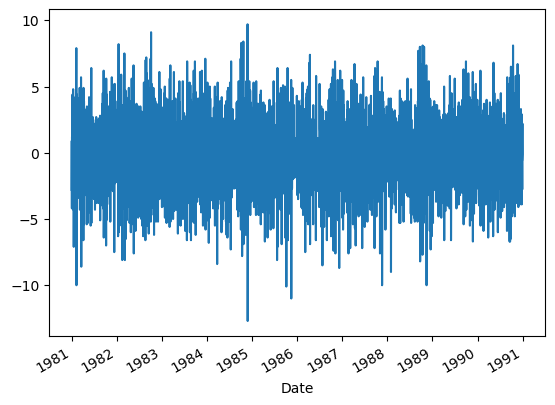

In [4]:
df['values_diff'].plot()

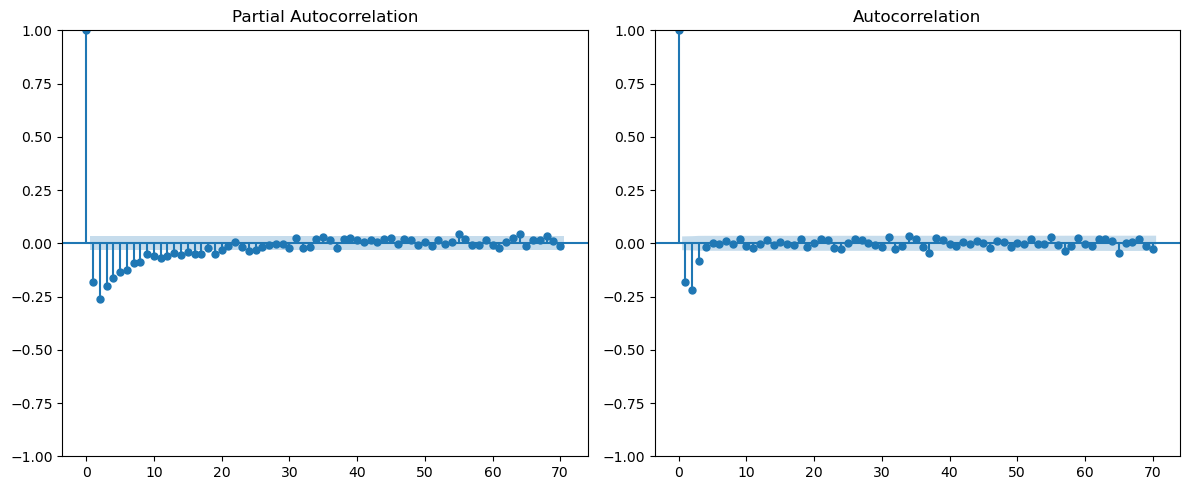

In [5]:
# acf and pacf side by side
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plot_pacf(df["values_diff"].dropna(), ax=axes[0], lags=70)
plot_acf(df["values_diff"].dropna(), ax=axes[1], lags=70)
plt.tight_layout()
plt.show()

In [6]:
# Downsample to weekly average
weekly = df.resample("W").mean()['values']
train = weekly.loc[:"1989"]
test = weekly.loc["1990":]

### How `TimeSeriesSplit` works

In [7]:
from sklearn.model_selection import TimeSeriesSplit

In [8]:
ts = TimeSeriesSplit(test_size=200)

In [9]:
splits = ts.split(X=df)

In [10]:
split1= next(splits)

In [11]:
split1

(array([   0,    1,    2, ..., 2647, 2648, 2649], shape=(2650,)),
 array([2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660,
        2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671,
        2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682,
        2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693,
        2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704,
        2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715,
        2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726,
        2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737,
        2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748,
        2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759,
        2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770,
        2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781,
        2782, 2783, 2784, 2785, 2786, 2787, 27

In [12]:
split2= next(splits)

In [13]:
split2

(array([   0,    1,    2, ..., 2847, 2848, 2849], shape=(2850,)),
 array([2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860,
        2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871,
        2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882,
        2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893,
        2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904,
        2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915,
        2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926,
        2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937,
        2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948,
        2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959,
        2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970,
        2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981,
        2982, 2983, 2984, 2985, 2986, 2987, 29

In [14]:
list_df_train = []
list_df_test = []

for index_train, index_test in ts.split(df):
    list_df_train.append(df.iloc[index_train])
    list_df_test.append(df.iloc[index_test])

In [15]:
list_df_train[0]

,values,values_diff
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,-2.8
...,...,...
1988-04-03,16.4,1.8
1988-04-04,13.6,-2.8


In [16]:
list_df_test[0]

,values,values_diff
Date,,
1988-04-05,15.9,2.3
1988-04-06,11.9,-4.0
...,...,...
1988-10-20,15.6,7.4
1988-10-21,10.3,-5.3


In [17]:
list_df_train[1]

,values,values_diff
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,-2.8
...,...,...
1988-10-20,15.6,7.4
1988-10-21,10.3,-5.3


In [18]:
list_df_test[1]

,values,values_diff
Date,,
1988-10-22,11.4,1.1
1988-10-23,9.7,-1.7
...,...,...
1989-05-09,9.5,-1.0
1989-05-10,12.5,3.0


In [19]:
from sklearn.model_selection import TimeSeriesSplit

horizon = int(52/4)
tscv = TimeSeriesSplit(test_size=horizon, max_train_size=52*5)
tscv

TimeSeriesSplit(gap=0, max_train_size=260, n_splits=5, test_size=13)

In [20]:
series = pd.concat([train, test])

In [21]:
series.shape

(523,)

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import root_mean_squared_error

# Fit SARIMA on weekly data
model = SARIMAX(train, order=(1, 1, 0))
model_fit = model.fit()

d = []
for fold, (train_idx, test_idx) in enumerate(tscv.split(series)):
    print(f"\nFold {fold + 1}")
    full_series = pd.concat([train, test])
    train_series = full_series.iloc[train_idx]
    test_series = full_series.iloc[test_idx][:horizon]

    print(train_series.shape)
    model = SARIMAX(
        train_series,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 52),
        enforce_invertibility=False,
        enforce_stationarity=False
    )
    model_fit = model.fit()
    
    start, end = train_series.index[[0, -1]]
    pred_train = model_fit.predict(start, end)
    
    start, end = test_series.index[[0, -1]]
    pred_test = model_fit.predict(start, end)

    r = {
        'training': {
            'start': train_series.index[0],
            'end': train_series.index[-1],
            'rmse': root_mean_squared_error(train_series, pred_train)
        },
        'test': {
            'start': test_series.index[0],
            'end': test_series.index[-1],
            'rmse': root_mean_squared_error(test_series, pred_test)
        },
    }
    
    print(r)
    
    d.append(r)


Fold 1
(260,)


/Users/sota/miniforge3/envs/work/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'training': {'start': Timestamp('1984-10-21 00:00:00'), 'end': Timestamp('1989-10-08 00:00:00'), 'rmse': 2.1349312247349927}, 'test': {'start': Timestamp('1989-10-15 00:00:00'), 'end': Timestamp('1990-01-07 00:00:00'), 'rmse': 1.931887387258325}}

Fold 2
(260,)


/Users/sota/miniforge3/envs/work/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'training': {'start': Timestamp('1985-01-20 00:00:00'), 'end': Timestamp('1990-01-07 00:00:00'), 'rmse': 2.306163179602357}, 'test': {'start': Timestamp('1990-01-14 00:00:00'), 'end': Timestamp('1990-04-08 00:00:00'), 'rmse': 1.1543645298858036}}

Fold 3
(260,)


/Users/sota/miniforge3/envs/work/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'training': {'start': Timestamp('1985-04-21 00:00:00'), 'end': Timestamp('1990-04-08 00:00:00'), 'rmse': 1.9631449951618536}, 'test': {'start': Timestamp('1990-04-15 00:00:00'), 'end': Timestamp('1990-07-08 00:00:00'), 'rmse': 1.4738060909566544}}

Fold 4
(260,)
{'training': {'start': Timestamp('1985-07-21 00:00:00'), 'end': Timestamp('1990-07-08 00:00:00'), 'rmse': 1.822987739535035}, 'test': {'start': Timestamp('1990-07-15 00:00:00'), 'end': Timestamp('1990-10-07 00:00:00'), 'rmse': 1.555563934881822}}

Fold 5
(260,)


KeyboardInterrupt: 

In [16]:
dfs = []
for i in d:
    df = pd.DataFrame(i)
    dfs.append(df)

df = pd.concat(dfs).reset_index(names='when')
df

,when,training,test
0,start,1981-01-04 00:00:00,1989-11-19 00:00:00
1,end,1989-11-12 00:00:00,1990-02-04 00:00:00
...,...,...,...
13,end,1990-10-14 00:00:00,1991-01-06 00:00:00
14,rmse,2.206555,1.696887


In [ ]:
# Use a range of horizons
horizons = [4, 12, 26, 52]  # 1, 3, 6, and 12 months


In [17]:
df.pivot(columns='when')

training                                                test  \
when                  end      rmse                start                  end   
0                     NaN       NaN  1981-01-04 00:00:00                  NaN   
1     1989-11-12 00:00:00       NaN                  NaN  1990-02-04 00:00:00   
..                    ...       ...                  ...                  ...   
13    1990-10-14 00:00:00       NaN                  NaN  1991-01-06 00:00:00   
14                    NaN  2.206555                  NaN                  NaN   

                                     
when      rmse                start  
0          NaN  1989-11-19 00:00:00  
1          NaN                  NaN  
..         ...                  ...  
13         NaN                  NaN  
14    1.696887                  NaN  

[15 rows x 6 columns]

In [11]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(actuals, preds)
print(f"\nTimeSeriesSplit RMSE: {rmse:.4f}")


TimeSeriesSplit RMSE: 1.5995


In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA on weekly data
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(10, 4))
plt.plot(test.index, test.values, label="Actual")
plt.plot(test.index, forecast, label="Forecast", color="orange")
plt.title("SARIMA Forecast (Weekly Data)")
plt.legend()

KeyboardInterrupt: 

In [7]:
horizon = 1  # forecast 1 week
history = train.copy()
preds = []
actuals = []

for i in range(0, len(test) - horizon + 1):
    model = SARIMAX(
        history,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 52),
        enforce_stationarity=False,
        enforce_invertibility=False,
    )
    model_fit = model.fit(disp=False)

    forecast = model_fit.forecast(steps=horizon)
    preds.extend(forecast)

    step_actual = test.iloc[i : i + horizon].value
    actuals.extend(step_actual)

    history = pd.concat([history, step_actual])

rmse = mean_squared_error(actuals, preds, squared=False)
print(f"Walk-forward RMSE: {rmse:.4f}")

KeyboardInterrupt: 

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(test.index[:len(preds)], actuals, label="Actual")
plt.plot(test.index[:len(preds)], preds, label="Forecast", color="orange")
plt.title("SARIMA Walk-Forward Forecast")
plt.legend()
plt.tight_layout()
plt.show()